In [1]:
import numpy as np
from vectorized_metrics import confmat
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
from ipywidgets import interact, SelectionSlider
import matplotlib.pyplot as plt
import scipy

In [2]:
def binary_clf_curve(y_true, y_score):
    pos_label = 1.0
    y_true = (y_true == pos_label)

    desc_score_indices = np.argsort(y_score, kind="mergesort")[::-1]
    y_score = y_score[desc_score_indices]
    y_true = y_true[desc_score_indices]

    distinct_value_indices = np.where(np.diff(y_score))[0]
    threshold_idxs = np.r_[distinct_value_indices, y_true.size - 1]

    tps = np.cumsum(y_true, dtype=np.float64)[threshold_idxs]
    fps = 1 + threshold_idxs - tps
    thr = y_score[threshold_idxs]

    return fps, tps, thr

In [3]:
ytrue = np.array([0, 0, 0, 1, 1, 1, 0, 1, 1, 1])
yscore = np.array([0.523, 0.957, 0.489, 0.244, 0.311, 0.093, 0.21 , 0.065, 0.552, 0.556])

In [4]:
%time a = confmat(*binary_clf_curve(ytrue, yscore)[:-1])

CPU times: user 1.16 ms, sys: 0 ns, total: 1.16 ms
Wall time: 1.55 ms


In [5]:
%%time 
for thr in sorted(yscore):
    confusion_matrix(ytrue, yscore>thr)

CPU times: user 11.7 ms, sys: 0 ns, total: 11.7 ms
Wall time: 11.5 ms


In [6]:
n = np.array([0.898, 0.910, 1.13, 1.39])
f = np.array([14, 80 ,800, 52*1000])
l = np.array([10**x for x in range(1, len(n)+1)], dtype=float)

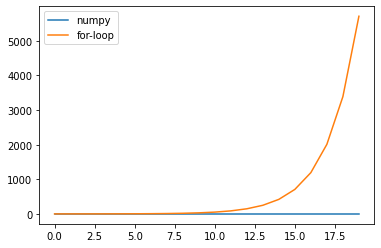

In [7]:
def func(x, a, b):
    return a*np.exp(b*x)

plt.plot(func(np.arange(20), *scipy.optimize.curve_fit(func,  l/1000,  n/1000)[0]), label='numpy')
plt.plot(func(np.arange(20), *scipy.optimize.curve_fit(func,  l/1000,  f/1000)[0]), label='for-loop')
plt.legend();
plt.savefig('results.png', dpi=300)

In [11]:
def plot_score(thr):
    fig = plt.figure(constrained_layout=True, figsize=(8, 6))
#     fig, axes = plt.subplots(1, 2, )
    gs = fig.add_gridspec(3, 2, height_ratios=[3, 1, 2], width_ratios=[2, 1], hspace=1)
    ax = fig.add_subplot(gs[0, :])
    ax2 = fig.add_subplot(gs[1, 1])
    ax3 = fig.add_subplot(gs[1, 0])
    ax4 = fig.add_subplot(gs[2, :])
    ax.plot(ytrue, linewidth=0, marker='o', c='C2')
    ax.plot(yscore, marker='o')
    ax.axhline(thr, c="C1", linestyle='--')
    ax.set_xticks([])
    cm = confusion_matrix(ytrue, yscore>=thr)
    df = np.array([['TN=', 'FP='], ['FN=', 'TP=']]) + pd.DataFrame(cm).astype(str)
    t = pd.plotting.table(ax2, df, loc='center')
    t.set_fontsize(34)
    t.scale(1, 3.66)
    ax2.axis("off")
    ax3.axis('off')
    ax3.text(0, 0.8, 'true: {}'.format(''.join(ytrue.astype(int).astype(str))), family='monospace', fontsize=20)
    ax3.text(0, 0.2, 'pred: {}'.format(''.join((yscore>=thr).astype(int).astype(str))), family='monospace', fontsize=20)
    tn, _, _, tp = cm.ravel()
    ax4.text(0.5, 0.5, r'$ACC=\frac{TP+TN}{TP+TN+FP+FN}=\frac{%d+%d}{%d+%d+%d+%d}=%.2f$' % (tp, tn, *cm.ravel(), (tp+tn)/(sum(cm.ravel()))),
            horizontalalignment='center', fontsize=20)
    ax4.axis("off")

interact(plot_score, thr=SelectionSlider(options=sorted(yscore)));

interactive(children=(SelectionSlider(description='thr', options=(0.065, 0.093, 0.21, 0.244, 0.311, 0.489, 0.5…